In [ ]:
#!Python 3

#for data wrangling
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#melebarkan kolom dan baris yg ditampilkan
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DiSkola/w10 - Project IV/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
#check statistical description ( numerical)
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#check statistical description ( categorical)
df.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#Eksplory Data Analysis

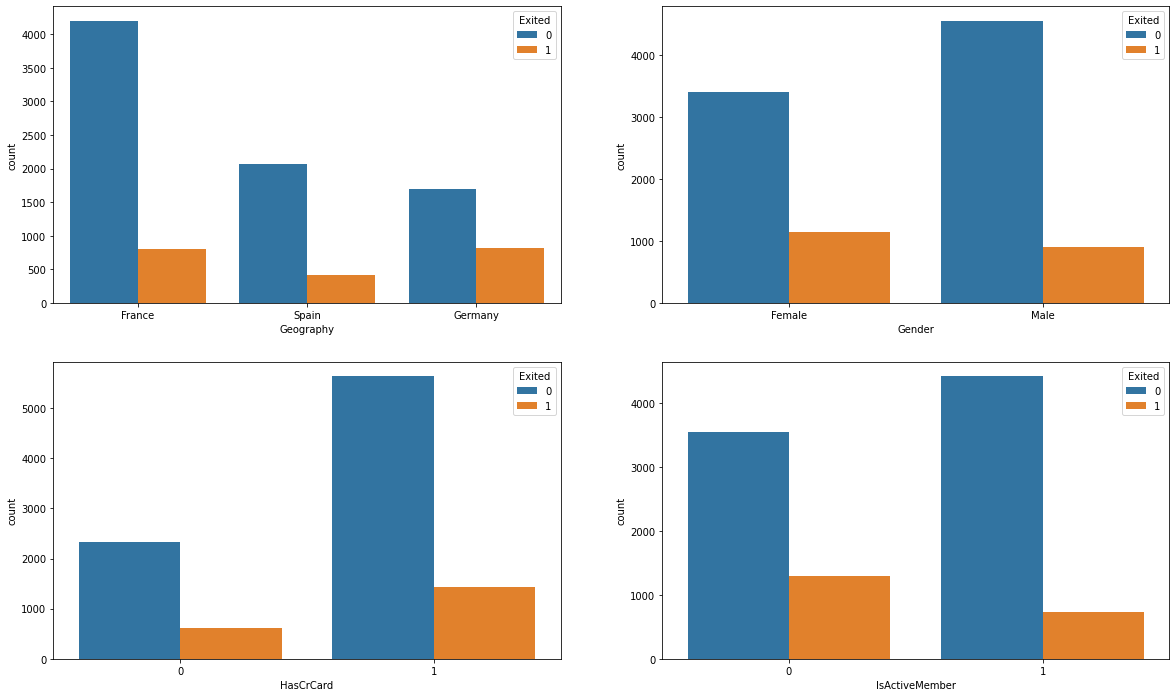

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

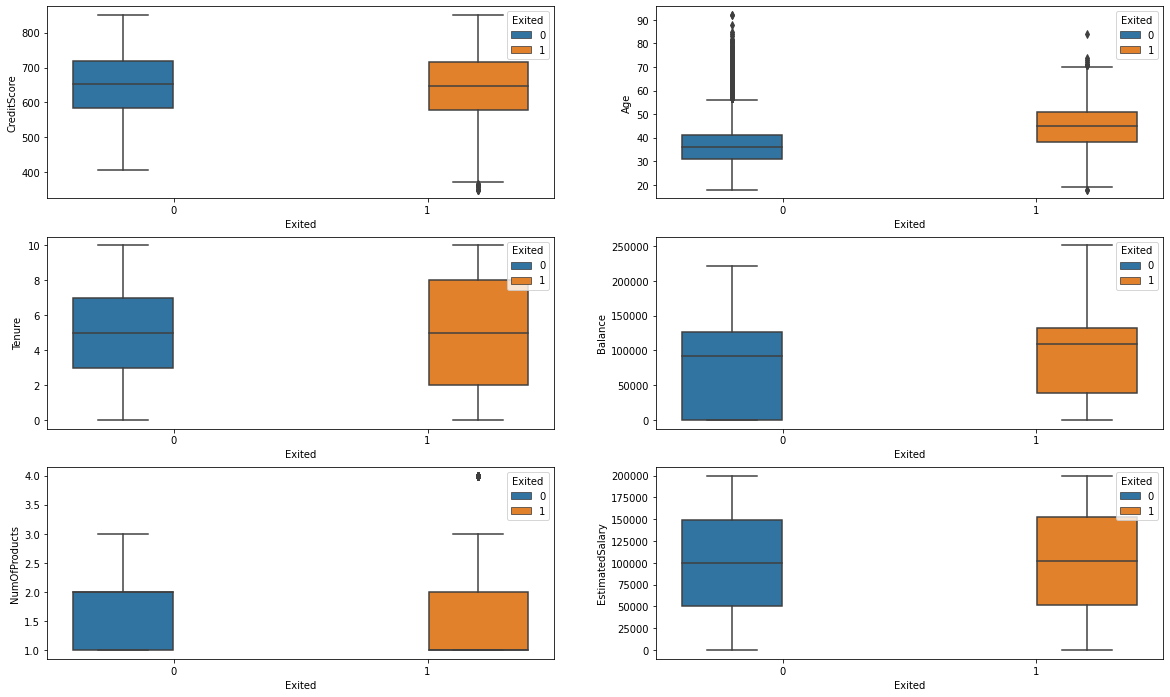

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

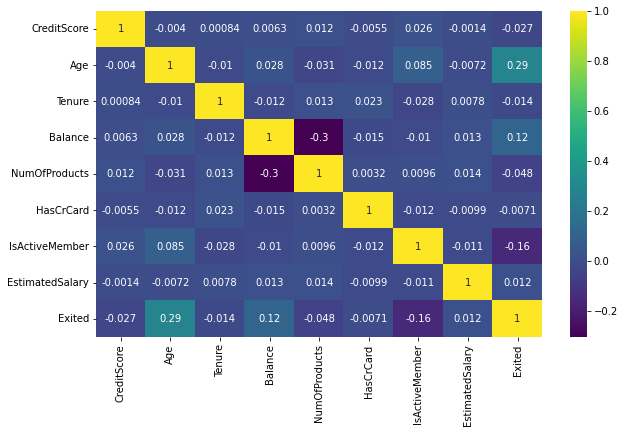

In [ ]:
#exited correlation matrix

cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap= 'viridis')

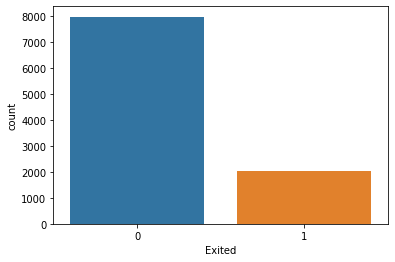

In [ ]:
sns.countplot(x= 'Exited', data=df)

#Feature Engineering

In [ ]:
df_fe = df.copy()

In [ ]:
# balance Salary ratio
df_fe['BalanceSalaryRatio'] = df_fe['Balance'] / df_fe['EstimatedSalary']

# given that tenure is a function of age, we introduce a variable aiming to standarize tenure
df_fe['TenureByAge'] = df_fe['Tenure'] / df_fe['Age']

# credit score given age to take into account credit behaviour visavis adult life
df_fe['CreditScoreGivenAge'] = df_fe['CreditScore'] / df_fe['Age']

In [ ]:
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


#Data preparation for model fitting

In [ ]:
# One hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder

lst = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[lst]).toarray(),
                         columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis = 1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0.0,0.0,1.0,1.0,0.0


In [ ]:
# minMax scalling the continuous variables
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(df_fe)
df_fe = pd.DataFrame(mm.transform(df_fe), columns=df_fe.columns)

df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.000070,0.043902,0.237252,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.000150,0.083721,0.354739,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split Train, test data
X = df_fe.drop(columns=['Exited']).copy()
y = df_fe['Exited'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(len(X_train))
print(len(X_test))

7500
2500


#Model fitting and selection


*   Logistic regression
*   KNN
*   Ensemble models






In [ ]:
#Fit Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Fit best Models

In [ ]:
# Fit logistic regression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Fit Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

#Review best model fit accuracy

In [ ]:
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      2003
         1.0       0.58      0.21      0.31       497

    accuracy                           0.81      2500
   macro avg       0.70      0.59      0.60      2500
weighted avg       0.78      0.81      0.78      2500



In [ ]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      2003
         1.0       0.56      0.30      0.39       497

    accuracy                           0.81      2500
   macro avg       0.70      0.62      0.64      2500
weighted avg       0.79      0.81      0.79      2500



In [ ]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2003
         1.0       0.78      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



#Resampling to handle imbalance dataset

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [ ]:
y_smote.value_counts()

1.0    5960
0.0    5960
Name: Exited, dtype: int64

In [ ]:
# Fit Random Forest classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2003
         1.0       0.58      0.59      0.59       497

    accuracy                           0.83      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.84      0.83      0.84      2500



#Feature Importance

<BarContainer object of 16 artists>

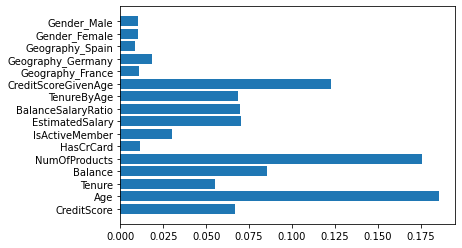

In [ ]:
fi = rf_smote.feature_importances_
col = X_train.columns
plt.barh(col,fi)

In [ ]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [ ]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60
